In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Load statistic package
from scipy import stats

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data1 = pd.read_csv('data-penumpang-bus-transjakarta-januari-2021.csv')
data2 = pd.read_csv('data-penumpang-bus-transjakarta-februari-2021.csv')
data3 = pd.read_csv('data-penumpang-bus-transjakarta-maret-2021.csv')
data4 = pd.read_csv('data-penumpang-bus-transjakarta-april-2021.csv')
data5 = pd.read_csv('data-penumpang-bus-transjakarta-mei-2021.csv')
data6 = pd.read_csv('data-penumpang-bus-transjakarta-juni-2021.csv')
data7 = pd.read_csv('data-penumpang-bus-transjakarta-juli-2021.csv')
data8 = pd.read_csv('data-penumpang-bus-transjakarta-agustus-2021.csv')
data9 = pd.read_csv('data-penumpang-bus-transjakarta-september-2021.csv')
data10 = pd.read_csv('data-penumpang-bus-transjakarta-oktober-2021.csv')
data11 = pd.read_csv('data-penumpang-bus-transjakarta-november-2021.csv')
data12 = pd.read_csv('data-penumpang-bus-transjakarta-desember-2021.csv')

# menggabungkan data bulanan
data= pd.concat([data1, data2, data3, data4, data5, data6, data7,
                               data8, data9, data10, data11, data12], ignore_index=True)
data


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,1,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,1473
1,2021,1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,20280
2,2021,1,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,28779
3,2021,1,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,54998
4,2021,1,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,60284
...,...,...,...,...,...,...
1468,2021,12,Angkutan Umum Integrasi,1A,PIK - Balai Kota,0
1469,2021,12,Angkutan Umum Integrasi,12B,Pluit - Senen,0
1470,2021,12,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,0
1471,2021,12,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0


In [3]:
# mengganti 'Angkutan umum Integrasi dengan Non BRT'
data['jenis'] = data['jenis'].replace('Angkutan Umum Integrasi', 'Non BRT')
data

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,1,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,1473
1,2021,1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,20280
2,2021,1,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,28779
3,2021,1,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,54998
4,2021,1,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,60284
...,...,...,...,...,...,...
1468,2021,12,Non BRT,1A,PIK - Balai Kota,0
1469,2021,12,Non BRT,12B,Pluit - Senen,0
1470,2021,12,Non BRT,11Q,Kampung Melayu - Pulo Gebang via BKT,0
1471,2021,12,Non BRT,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0


In [4]:
# cek duplicate data
data.duplicated().sum()

0

In [5]:
# cek missing value
data.isnull().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [6]:
# melihat bagian mana dalam data yang terdapat missing value
missing_in_columns = data.isna().sum()
rows_with_missing_values = data[data.isna().any(axis=1)]
missing_in_columns
rows_with_missing_values

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1411,2021,12,Mikrotrans,JAK.10B,NaN,4085
1412,2021,12,Mikrotrans,JAK.10A,NaN,33992


ternyata ada baris kosong dalam kolom trayek. Berdasarkan situs transjakarta (https://transjakarta.co.id/peta-rute/), ternyata Kode trayek JAK.10A adalah trayek GONDANGDIA - CIKINI VIA SALEMBA RAYA dan JAK.10B adalah trayek GONDANGDIA - CIKINI VIA KRAMAT RAYA

In [7]:
# mengisi baris kosong dalam kolom 'trayek' sesuai peta rute transjakarta
data.loc[data['kode_trayek'] == 'JAK.10B', 'trayek'] = 'GONDANGDIA - CIKINI VIA KRAMAT RAYA'
data.loc[data['kode_trayek'] == 'JAK.10A', 'trayek'] = 'GONDANGDIA - CIKINI VIA SALEMBA RAYA'

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1473 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


# Menentukan sampel

In [9]:
# menentukan rata-rata populasi dari jumlah penumpang
true_mean = np.mean(data["jumlah_penumpang"])

print(f"Rata-rata populasi dari jumlah penumpang transjakarta tahun 2021 adalah {true_mean:.0f} orang")

Rata-rata populasi dari jumlah penumpang transjakarta tahun 2021 adalah 81676 orang


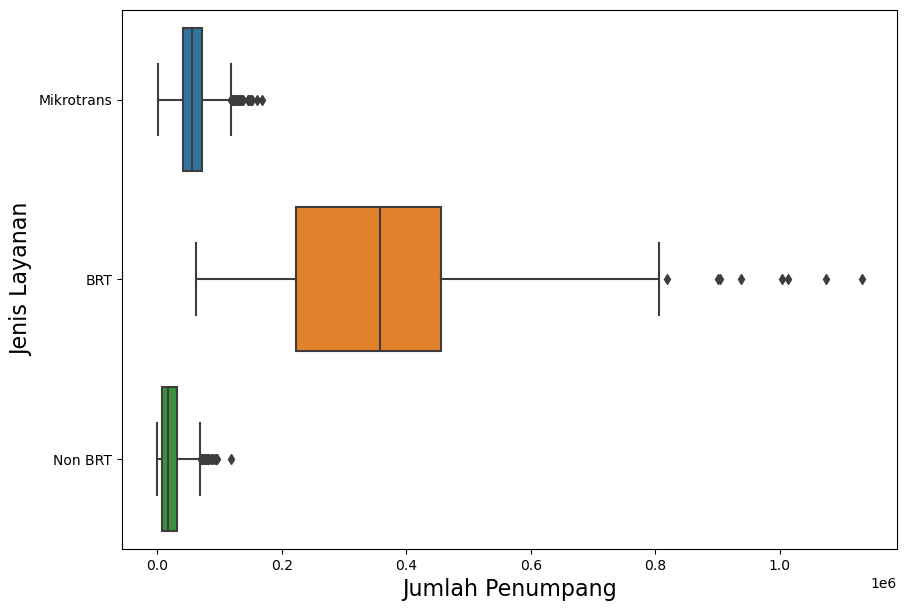

In [10]:
# membuat boxplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.boxplot(data = data,
            x = "jumlah_penumpang",
            y = "jenis",
            ax = ax)

ax.set_xlabel("Jumlah Penumpang", fontsize=16)
ax.set_ylabel("Jenis Layanan", fontsize=16)

plt.show()

Dari boxplot diatas, diketahui bahwa:
1. Data tersebut tidak homogen
2. Terdapat perbedaan median dalam jumlah penumpang

Karena tidak diketahui tentang biaya dan variansi populasinya, maka alokasi sampel yang digunakan adalah proportional alocation dengan rumus:

$$
n_{h} = n \cdot \cfrac{N_{h}}{N}
$$

In [11]:
# menghitung jumlah N_list
jumlah_N_list = data.groupby('jenis')['jenis'].count()
jumlah_N_list

jenis
BRT           156
Mikrotrans    848
Non BRT       469
Name: jenis, dtype: int64

dari data diatas, diketahui:

<center>

|Strata, $h$|1. BRT|2. Non BRT|3. Mikrotrans|
|:|:|:|:|
|$N_{h}$|156|848|469|
|$n_{h}$|...|...|...|

</center>

In [12]:
# Given
N_list = [156, 848, 469]
n = 500
N = 1473
n_list = []
for h in range(3):
    # mengambil data
    N_h = N_list[h]

    # menghitung sample size tiap strata dengan rumus:
    n_h = n * (N_h/N)

    if h == 2:
        n_h = n - np.sum(n_list)

    # menyimpan sample size
    n_list.append(int(n_h))

print(n_list)

[52, 287, 161]


<center>

|Strata, $h$|1. BRT|2. Non BRT|3. Mikrotrans|
|:|:|:|:|
|$N_{h}$|156|848|469|
|$n_{h}$|52|287|161|

</center>

Untuk tiap strata, dilakukan SRS

<center>

|Strata, $h$|1. BRT|2. Non BRT|3. Mikrotrans|
|:|:|:|:|
|$N_{h}$|156|848|469|
|$n_{h}$|52|287|161|
|$\bar{y}_{h}$|...|...|...|
|$s_{h}^{2}$|...|...|...|

</center>

In [13]:
# membuat list untuk menyimpan mean & variance tiap strata
strata_names = ["BRT", "Non BRT", "Mikrotrans"]
mean_list = []
var_list = []

for h in range(3):
    # 0. mengambil data
    N_h = N_list[h]
    n_h = n_list[h]

    # 1. menyaring spesifik strata
    data_strata_h = data[data["jenis"] == strata_names[h]]

    # 2. mengambil SRS dari strata data
    sample_strata_h = data_strata_h.sample(n = n_h,
                                           replace = False,
                                           random_state = 22)
    
    # 3. menghitung mean & variance
    mean_h = np.mean(sample_strata_h["jumlah_penumpang"])
    var_h = np.var(sample_strata_h["jumlah_penumpang"], ddof = 1)

    mean_list.append(mean_h)
    var_list.append(var_h)

print(mean_list)
print(var_list)

[396469.5961538461, 23479.881533101045, 59463.80745341615]
[52708800630.99057, 570515082.0138887, 588114474.0064441]



<center>

|Strata, $h$|1. BRT|2. Non BRT|3. Mikrotrans|
|:|:|:|:|
|$N_{h}$|156|848|469|
|$n_{h}$|52|287|161|
|$\bar{y}_{h}$|396469.59|23479.88|59463.80|
|$s_{h}^{2}$|52708800630.99|570515082.01|588114474.00|

</center>

#### Menghitung rata-rata populasi

In [14]:
est_pop_sum = 0
for h in range(3):
    # mengambil data
    N_h = N_list[h]
    y_bar_h = mean_list[h]

    # menjumlahkan data
    est_pop_sum += N_h * y_bar_h

est_pop_mean = est_pop_sum / N

print(f"Unbiased estimate of population mean dari sampel")
print(f"Rata-rata jumlah penumpang   : {est_pop_mean:.0f} orang")

Unbiased estimate of population mean dari sampel
Rata-rata jumlah penumpang   : 74439 orang


#### Menghitung variance estimator dengan rumus:

$$
\widehat{\text{var}}(\bar{y}_{st}) =
\sum_{h=1}^{L}
\left ( \cfrac{N_{h}}{N} \right )^{2}
\left ( \cfrac{N_{h}-n_{h}}{N_{h}} \right )
\cfrac{s_{h}^{2}}{n_{h}}
$$

In [15]:
var_est = 0
for h in range(3):
    # mengambil data
    N_h = N_list[h]
    n_h = n_list[h]
    ybar_h = mean_list[h]
    s2_h = var_list[h]

    var_est += ((N_h/N)**2) * ((N_h-n_h)/N_h) * (s2_h/n_h)

print(f"Variance of mean estimator      : {var_est:.3f}")

Variance of mean estimator      : 8258400.828


#### Menghitung Margin of Error

In [16]:
# menghitung z_stat @ 95% CI
alpha = 0.05
z_stat = stats.norm.ppf(1 - alpha/2.)
print(f"z_stat              : {z_stat:.2f}")

# menghitung margin of error (d)
d = z_stat * np.sqrt(var_est)
print(f"margin of error     : {d:.0f} orang")

z_stat              : 1.96
margin of error     : 5632 orang


In [17]:
# Menghitung Cnfidence Interval
lb = est_pop_mean - d
ub = est_pop_mean + d

print(f"Dengan 95% confidence interval, nilai rata-rata asli banyaknya jumlah penumpang Transakarta \
Tahun 2021 berkisar antara {lb:.0f} orang hingga {ub:.0f} orang")

Dengan 95% confidence interval, nilai rata-rata asli banyaknya jumlah penumpang Transakarta Tahun 2021 berkisar antara 68807 orang hingga 80071 orang


### Kesimpulan

1. Hasil perhitungan menggunakan metode stratified sampling menunjukkan estimasi rata-rata banyaknya penumpang Transjakarta Tahun 2021 adalah sebesar 74439 orang.
2. Dengan 95% confidence interval, nilai rata-rata asli banyaknya penumpang Transjakarta Tahun 2021 berkisar antara 68807 orang hingga 80071 orang.
3. Banyaknya data jumlah penumpang harus di imbangi dengan banyaknya jumlah sampel yang diambil agar lebih akurat.
4. Nilai rata-rata banyaknya jumlah penumpang ini dapat dijadikan nilai acuan dalam mengembangkan sistem transportasi umum berbasis bus (menambah atau mengurangi trayek sesuai demand penumpang).
5. Data dapat dieksplorasi lebih jauh dengan meneliti sampel-sampel dari tiap layanan hingga sampel-sampel dari trayek tiap-tiap jenis layanan. Sehingga didapat data yang lebih akurat dalam mengestimasi kebutuhan bus / jumlah jalur/ trayek sesuai dengan demand penumpang.
6. Kelemahan dari rancangan sampling ini adalah belum memperhitungkan biaya-biaya yang timbul saat sampling.
7. Data tahun 2021 adalah data setahun setelah pandemi COVID. Kemungkinan adanya ketidaksesuaian karena terkait kebijakan pemerintah tentang pembatasan kegiatan di tempat umum.  